### IMPORTED LIBRARY

#### CREATED BY :
##### 1) MUHAMMAD HAZIQ BIN MOHAMAD WAHID (154142)
##### 2) Puvinthana Ainamutherian (154774)
##### 3) Thivaagar Loganathan (153074)
##### 4) Kuganraj Selvaraj (153470)
##### THIS IS OWNED BY STUDENT OF UNIVERSITY OF SCIENCE, MALAYSIA/ UNIVERSITI SAINS MALAYSIA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt### IMPORTED LIBRARY
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORTED LIBRARY
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report

### Getting the data

In [3]:
#Load dataset from CSV File using Pandas
data = pd.read_csv('steel_faults.csv')

In [4]:
# Checking the Data from the same file directory')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [5]:
# print the few initial value of the data to make sure its correct
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


### Info of our data

In [6]:
display(data.describe(include='all'))

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,3.841319
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,2.144175
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,2.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,5.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,6.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,6.000000


### The correlation Matrix between the data

<AxesSubplot:>

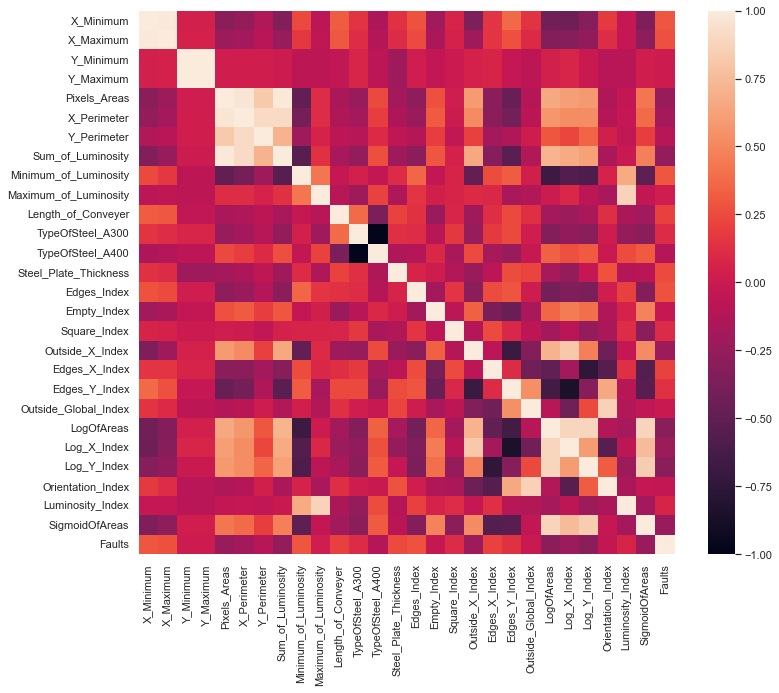

In [7]:
sns.set(rc={'figure.figsize':(12,10)})
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)


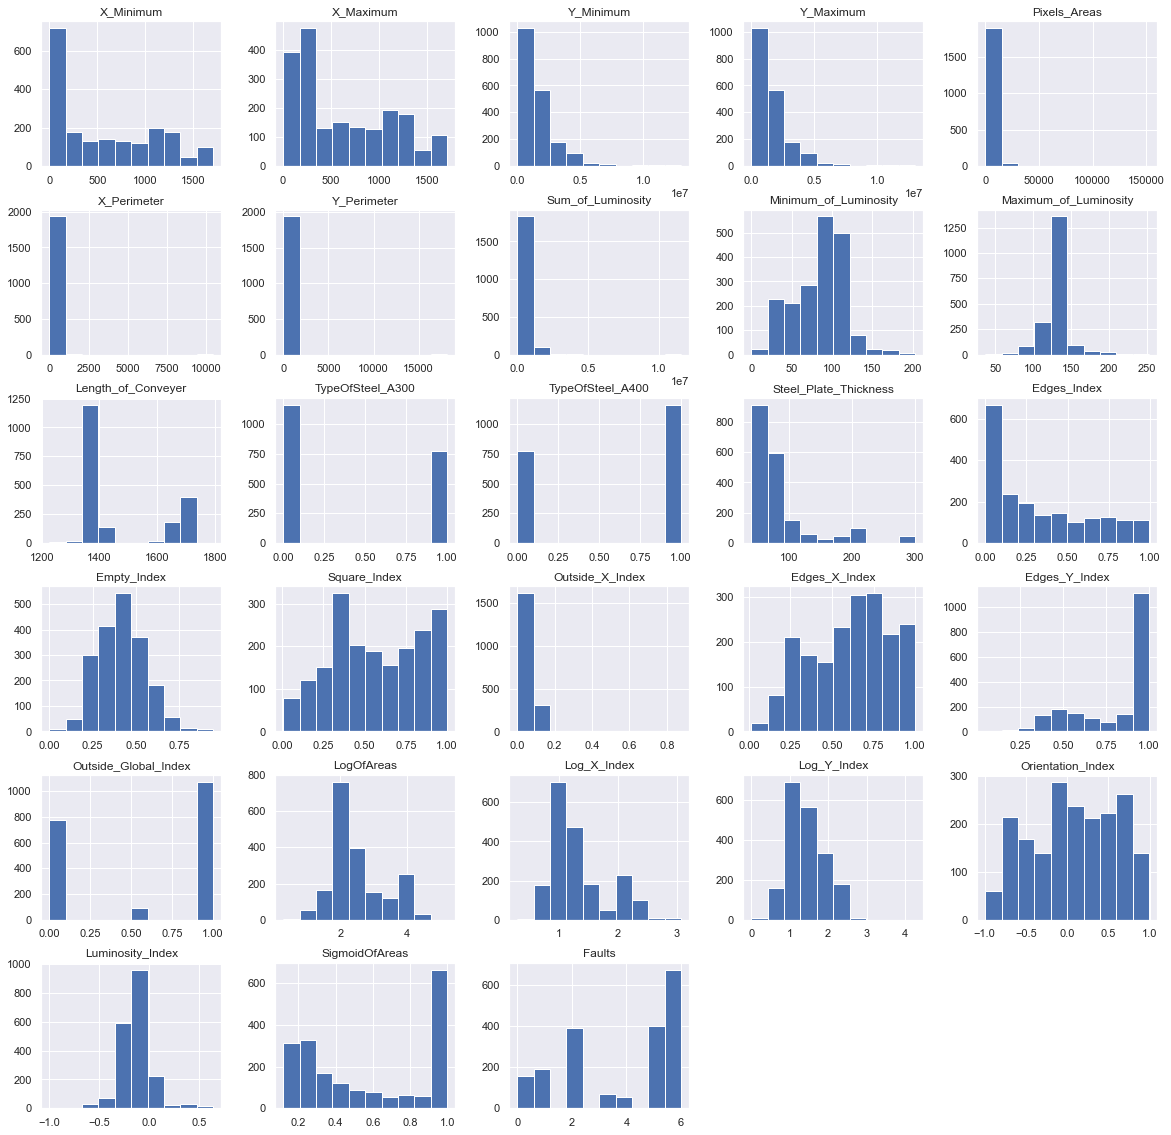

In [8]:
data.hist(figsize=(20,20))  #histogram according to their x variable
plt.show()

### Getting the x and y value 

In [9]:
data1 = data.values
y_dataFrame = data[["Faults"]]
features = data1[:,0:27]
x= pd.DataFrame(features)

In [10]:
x

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249.0,277.0,325780.0,325796.0,273.0,54.0,22.0,35033.0,119.0,141.0,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144.0,175.0,340581.0,340598.0,287.0,44.0,24.0,34599.0,112.0,133.0,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145.0,174.0,386779.0,386794.0,292.0,40.0,22.0,37572.0,120.0,140.0,...,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137.0,170.0,422497.0,422528.0,419.0,97.0,47.0,52715.0,117.0,140.0,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


In [11]:
y_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Faults  1941 non-null   int64
dtypes: int64(1)
memory usage: 15.3 KB


In [12]:
y= np.array(y_dataFrame)

In [13]:
y.shape

(1941, 1)

In [14]:
sc=StandardScaler()
X=sc.fit_transform(x)

In [15]:
X.shape

(1941, 27)

### Splitting the Data set into training and test set

In [16]:
seed_num= 5
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed_num)
print(X_train.shape)
print(y_train.shape)

(1552, 27)
(1552, 1)


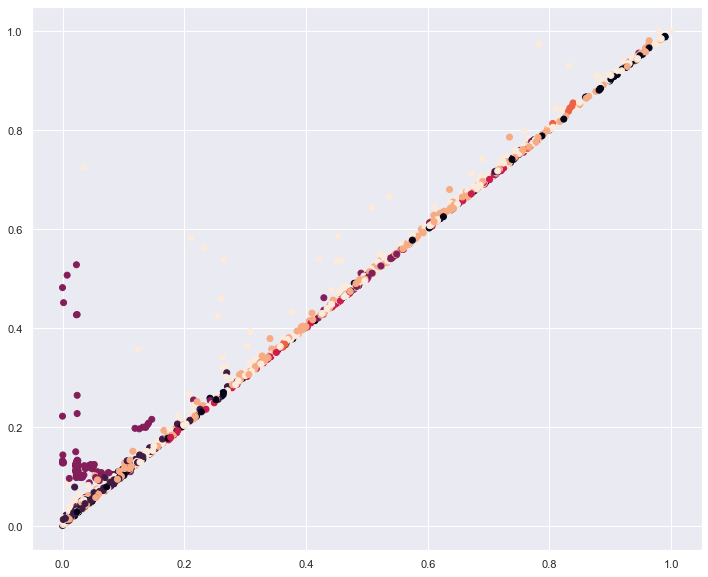

In [17]:
row,column = X_train.shape
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

# Decision Tree

In [18]:
model_dt = DecisionTreeClassifier(criterion='gini', random_state=seed_num)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_dt.predict(X_test)

train_accuracy = accuracy_score(y_test, y_pred)
cfsMatrix = confusion_matrix(y_test, y_pred)
clsReport = classification_report(y_test, y_pred)
                             
print('The accuracy of the algorithm is : ' ,train_accuracy, '\n')
print('The confusion matrix of this algorithm is :')
print(cfsMatrix)
print('\nThe classification report is : \n')
print(clsReport)

The accuracy of the algorithm is :  0.7017994858611826 

The confusion matrix of this algorithm is :
[[16  0  0  0  1  3 11]
 [ 0 28  2  0  0  0  1]
 [ 0  0 73  0  0  1  7]
 [ 0  0  1  9  0  1  2]
 [ 0  0  0  0  9  3  2]
 [ 3  2  1  0  2 46 26]
 [12  3  3  2  0 27 92]]

The classification report is : 

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        31
           1       0.85      0.90      0.88        31
           2       0.91      0.90      0.91        81
           3       0.82      0.69      0.75        13
           4       0.75      0.64      0.69        14
           5       0.57      0.57      0.57        80
           6       0.65      0.66      0.66       139

    accuracy                           0.70       389
   macro avg       0.72      0.70      0.71       389
weighted avg       0.70      0.70      0.70       389



### Finding the best value of K
##### Since the accuracy of the algorithm is pretty low, thus we will try to find our own K

In [20]:
dt_models = []
depths = np.arange(1,5)
for d in depths :
    model = DecisionTreeClassifier(criterion = 'gini', min_samples_split=15, max_depth=d, random_state=seed_num)
    model.fit(X_train, y_train)
dt_models.append(model)

In [21]:
 best_acc = 0
model_best = None
for m,d in zip(dt_models, depths):
    acc = m.score(X_test, y_test)
    print(f'Decision Tree classifier with max_depth={d} achieves a mean accuracy of {acc}')
    if acc > best_acc:
        best_acc = acc
        model_best = m

Decision Tree classifier with max_depth=1 achieves a mean accuracy of 0.570694087403599


In [22]:
y_pred = model_best.predict(X_test)

print('The accuracy of the algorithm is : ' , accuracy_score(y_test, y_pred), '\n')
print('The confusion matrix of this algorithm is :\n')
print(confusion_matrix(y_test, y_pred))
print('\nThe classification report is : \n')
print(classification_report(y_test,y_pred))

The accuracy of the algorithm is :  0.570694087403599 

The confusion matrix of this algorithm is :

[[ 0  1  0  0  0  3 27]
 [ 0 26  1  0  0  2  2]
 [ 0  0 65  0  0 11  5]
 [ 0  0  0  8  0  1  4]
 [ 0  0  0  0  0  2 12]
 [ 0  8  1  0  0 46 25]
 [ 0 10  0  0  0 52 77]]

The classification report is : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.58      0.84      0.68        31
           2       0.97      0.80      0.88        81
           3       1.00      0.62      0.76        13
           4       0.00      0.00      0.00        14
           5       0.39      0.57      0.47        80
           6       0.51      0.55      0.53       139

    accuracy                           0.57       389
   macro avg       0.49      0.48      0.47       389
weighted avg       0.54      0.57      0.55       389



In [23]:
from sklearn.tree import plot_tree, export_text

#plot_tree(model_dt)
print(export_text(model_best, feature_names=list(x.columns)))

|--- 22 <= 0.63
|   |--- 21 <= 0.22
|   |   |--- 7 <= 0.00
|   |   |   |--- class: 2
|   |   |--- 7 >  0.00
|   |   |   |--- 10 <= 0.53
|   |   |   |   |--- class: 3
|   |   |   |--- 10 >  0.53
|   |   |   |   |--- class: 6
|   |--- 21 >  0.22
|   |   |--- 10 <= 0.23
|   |   |   |--- 12 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- 12 >  0.50
|   |   |   |   |--- class: 6
|   |   |--- 10 >  0.23
|   |   |   |--- 16 <= 0.50
|   |   |   |   |--- class: 6
|   |   |   |--- 16 >  0.50
|   |   |   |   |--- class: 5
|--- 22 >  0.63
|   |--- 0 <= 0.18
|   |   |--- 24 <= 0.05
|   |   |   |--- class: 6
|   |   |--- 24 >  0.05
|   |   |   |--- 1 <= 0.09
|   |   |   |   |--- class: 6
|   |   |   |--- 1 >  0.09
|   |   |   |   |--- class: 2
|   |--- 0 >  0.18
|   |   |--- class: 6



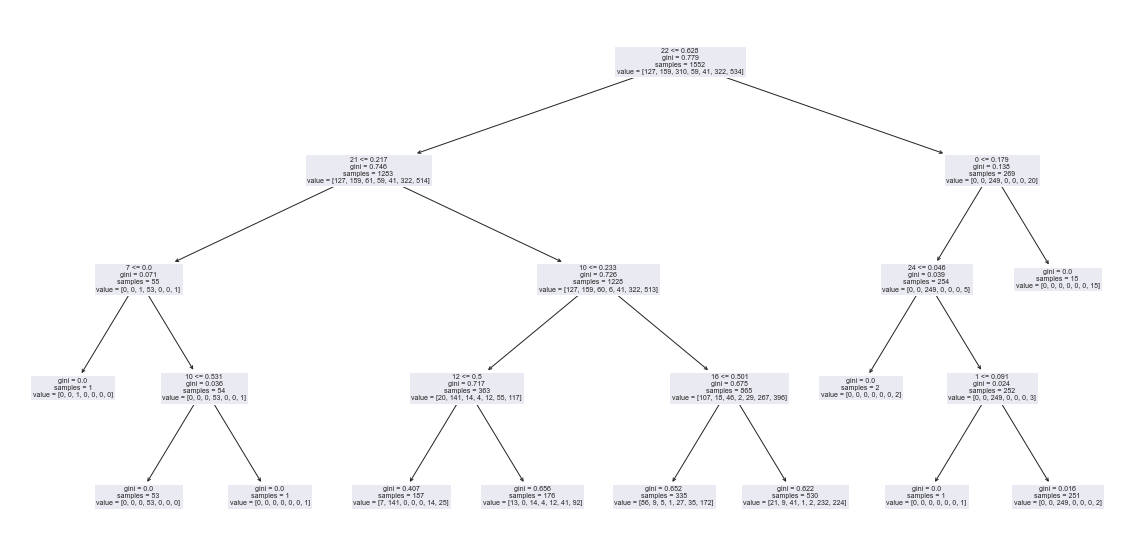

In [24]:
from matplotlib import pyplot as plt

# increase the value if the size of the image is too small
plt.figure(figsize=(20,10)) 
plot_tree(model_best, feature_names=list(x.columns))

plt.show()
#plt.savefig('tree.png')

In [25]:
improvement = best_acc -train_accuracy
print("The accuracy has improve by very least significance of number by\n", improvement)

The accuracy has improve by very least significance of number by
 -0.13110539845758362


# KNearest Neighbour Algorithm

In [26]:
#using default value of k =5 
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = model_knn.predict(X_test)

train_accuracy = accuracy_score(y_test, y_pred)
cfsMatrix = confusion_matrix(y_test, y_pred)
clsReport = classification_report(y_test, y_pred)
                             
print('The accuracy of the algorithm is : ' ,train_accuracy, '\n')
print('The confusion matrix of this algorithm is :')
print(cfsMatrix)
print('The classification report is : \n')
print(clsReport)

The accuracy of the algorithm is :  0.6863753213367609 

The confusion matrix of this algorithm is :
[[17  1  0  0  0  6  7]
 [ 0 27  0  0  0  3  1]
 [ 0  2 74  2  0  0  3]
 [ 0  0  0  9  0  1  3]
 [ 2  0  0  0 11  1  0]
 [ 6  2  2  0  2 49 19]
 [10  4  2  4  0 39 80]]
The classification report is : 

              precision    recall  f1-score   support

           0       0.49      0.55      0.52        31
           1       0.75      0.87      0.81        31
           2       0.95      0.91      0.93        81
           3       0.60      0.69      0.64        13
           4       0.85      0.79      0.81        14
           5       0.49      0.61      0.55        80
           6       0.71      0.58      0.63       139

    accuracy                           0.69       389
   macro avg       0.69      0.71      0.70       389
weighted avg       0.70      0.69      0.69       389



### Finding the best value of K
##### Since the accuracy of the algorithm is pretty low, thus we will try to find our own K

In [28]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed_num) # random_state is set to a value for reproducible
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)

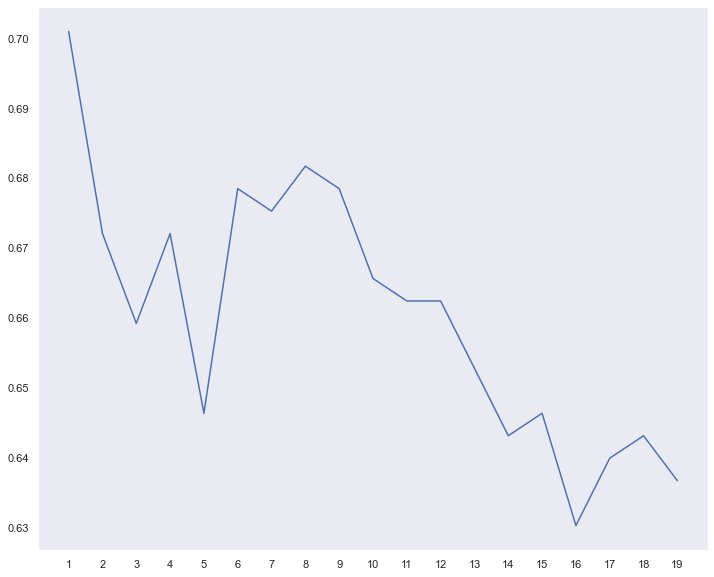

0.7009646302250804


In [29]:
scores = []
max_score = 0
best_k = 0
for k in range(1,20):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    score = model_knn.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)
    
plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()

print(max(scores))


In [30]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

improved_accr =accuracy_score(y_test, y_pred)

print( 'The accuracy after finding our own k :',improved_accr)
print('\nThe confusion matrix is :')
print(confusion_matrix(y_test, y_pred))
print('\nThe classification report is :\n')
print(classification_report(y_test, y_pred))

The accuracy after finding our own k : 0.6966580976863753

The confusion matrix is :
[[18  0  1  0  0  4  8]
 [ 1 27  0  0  0  2  1]
 [ 0  2 74  1  0  0  4]
 [ 0  0  0  9  0  1  3]
 [ 0  0  0  0 10  1  3]
 [ 5  2  1  0  0 49 23]
 [10  4  1  4  0 36 84]]

The classification report is :

              precision    recall  f1-score   support

           0       0.53      0.58      0.55        31
           1       0.77      0.87      0.82        31
           2       0.96      0.91      0.94        81
           3       0.64      0.69      0.67        13
           4       1.00      0.71      0.83        14
           5       0.53      0.61      0.57        80
           6       0.67      0.60      0.63       139

    accuracy                           0.70       389
   macro avg       0.73      0.71      0.72       389
weighted avg       0.71      0.70      0.70       389



In [31]:
improvement =improved_accr -train_accuracy
print("The accuracy has improve by very least significance of number by\n +", improvement)

The accuracy has improve by very least significance of number by
 + 0.010282776349614386


# Feature Selection

###### Corellation coeff of 'TypeOSteel A300' and "TypeOSteel A400" is -1 so we can drop one of them


In [32]:
data= data.drop('TypeOfSteel_A400',axis=1)
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,6
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,6
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,6
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,6


#### Using the featurewiz package to do the feature selection
#### If the !pip cannot be install, try to press refresh button and rerun the code

Imported version = 0.1.55.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1941, 27)
    Loaded train data. Shape = (1941, 27)
No test data filename given...
##################

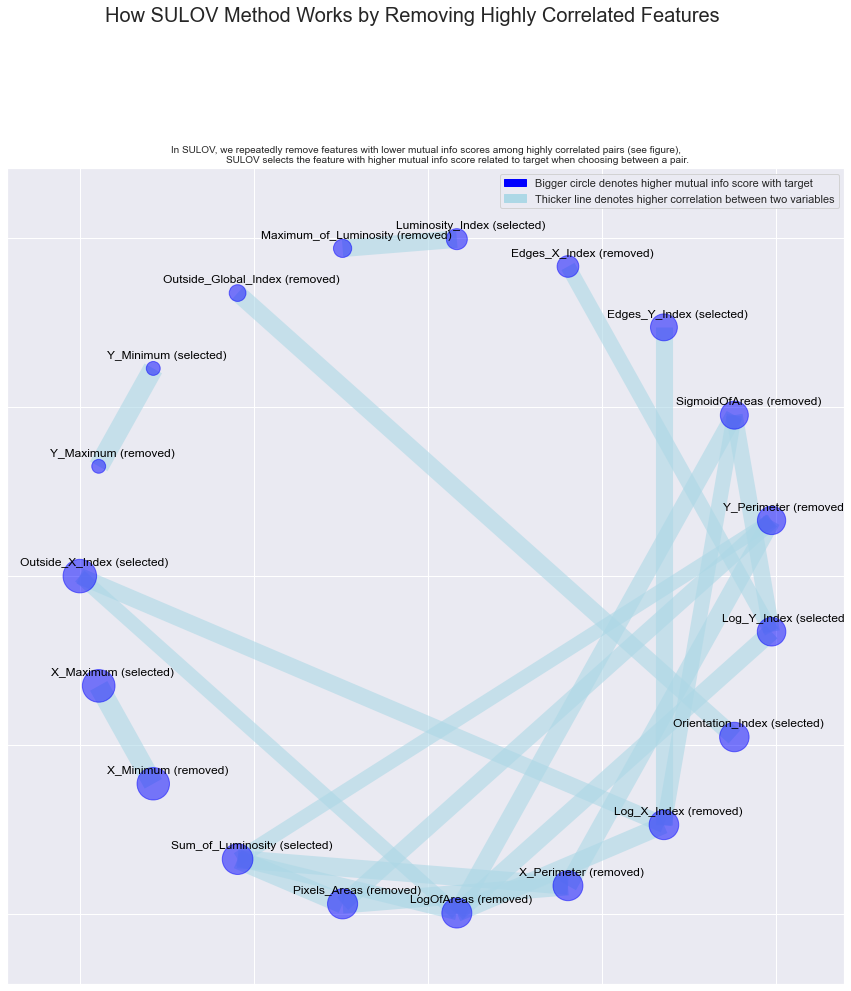

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 15
Final list of selected vars after SULOV = 15
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 15 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 15 variables...
            Time taken for regular XGBoost feature selection = 3 seconds
        using 12 variables...
            Time taken for regular XGBoost feature selection = 5 seconds
        using 9 variables...
            Time taken for regular XGBoost feature selection 

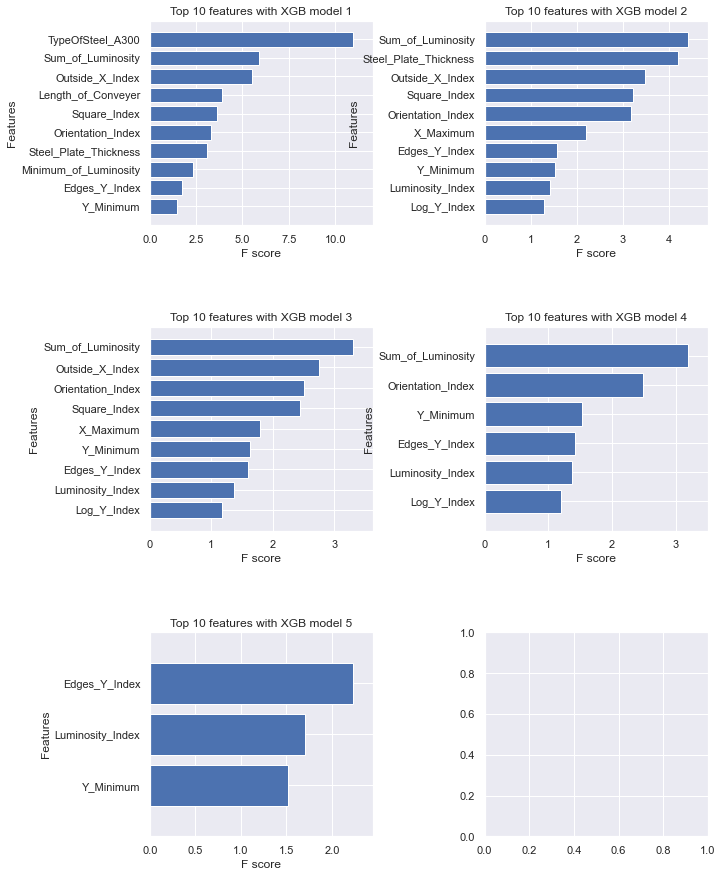

            Total time taken for XGBoost feature selection = 15 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 13 important features:
['TypeOfSteel_A300', 'Sum_of_Luminosity', 'Outside_X_Index', 'Length_of_Conveyer', 'Square_Index', 'Orientation_Index', 'Steel_Plate_Thickness', 'Minimum_of_Luminosity', 'Edges_Y_Index', 'Y_Minimum', 'X_Maximum', 'Luminosity_Index', 'Log_Y_Index']

    Time taken for feature selection = 17 seconds
Returning 2 dataframes: dataname and test_data with 13 important features.


In [33]:
!pip install featurewiz
from featurewiz import featurewiz
target = 'Faults'
features, train = featurewiz(data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [34]:
#Our new impoertant feature base from featurewiz

print('The important feature is : \n')
features

The important feature is : 



['TypeOfSteel_A300',
 'Sum_of_Luminosity',
 'Outside_X_Index',
 'Length_of_Conveyer',
 'Square_Index',
 'Orientation_Index',
 'Steel_Plate_Thickness',
 'Minimum_of_Luminosity',
 'Edges_Y_Index',
 'Y_Minimum',
 'X_Maximum',
 'Luminosity_Index',
 'Log_Y_Index']

In [35]:
train

,TypeOfSteel_A300,Sum_of_Luminosity,Outside_X_Index,Length_of_Conveyer,Square_Index,Orientation_Index,Steel_Plate_Thickness,Minimum_of_Luminosity,Edges_Y_Index,Y_Minimum,X_Maximum,Luminosity_Index,Log_Y_Index,Faults
0,1,24220,0.0047,1687,0.1818,0.8182,80,76,1.0000,270900,50,-0.2913,1.6435,0
1,1,11397,0.0036,1687,0.2069,0.7931,80,84,0.9667,2538079,651,-0.1756,1.4624,0
2,1,7972,0.0037,1623,0.3333,0.6667,100,99,0.9474,1553913,835,-0.1228,1.2553,0
3,0,18996,0.0052,1353,0.1556,0.8444,290,99,1.0000,369370,860,-0.1568,1.6532,0
4,0,246930,0.0126,1353,0.0662,0.9338,185,37,0.9885,498078,1306,-0.1992,2.4099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0,35033,0.0206,1360,0.5714,-0.4286,40,119,0.7273,325780,277,0.0026,1.2041,6
1937,0,34599,0.0228,1360,0.5484,-0.4516,40,112,0.7083,340581,175,-0.0582,1.2305,6
1938,0,37572,0.0213,1360,0.5172,-0.4828,40,120,0.6818,386779,174,0.0052,1.1761,6
1939,0,52715,0.0243,1360,0.9394,-0.0606,40,117,0.6596,422497,170,-0.0171,1.4914,6


### Our new X and Y data after getting the important feature

In [36]:
X_new = train.drop(['Faults'],axis=1)
y_new = train.Faults.values

In [37]:
X_new

,TypeOfSteel_A300,Sum_of_Luminosity,Outside_X_Index,Length_of_Conveyer,Square_Index,Orientation_Index,Steel_Plate_Thickness,Minimum_of_Luminosity,Edges_Y_Index,Y_Minimum,X_Maximum,Luminosity_Index,Log_Y_Index
0,1,24220,0.0047,1687,0.1818,0.8182,80,76,1.0000,270900,50,-0.2913,1.6435
1,1,11397,0.0036,1687,0.2069,0.7931,80,84,0.9667,2538079,651,-0.1756,1.4624
2,1,7972,0.0037,1623,0.3333,0.6667,100,99,0.9474,1553913,835,-0.1228,1.2553
3,0,18996,0.0052,1353,0.1556,0.8444,290,99,1.0000,369370,860,-0.1568,1.6532
4,0,246930,0.0126,1353,0.0662,0.9338,185,37,0.9885,498078,1306,-0.1992,2.4099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0,35033,0.0206,1360,0.5714,-0.4286,40,119,0.7273,325780,277,0.0026,1.2041
1937,0,34599,0.0228,1360,0.5484,-0.4516,40,112,0.7083,340581,175,-0.0582,1.2305
1938,0,37572,0.0213,1360,0.5172,-0.4828,40,120,0.6818,386779,174,0.0052,1.1761
1939,0,52715,0.0243,1360,0.9394,-0.0606,40,117,0.6596,422497,170,-0.0171,1.4914


In [38]:
y_new = train[["Faults"]]
y_new= np.array(y_new)
y_new.shape

(1941, 1)

### Splitting the dataset to train and test

In [39]:
seed_num= 5
scaler = MinMaxScaler()
X = scaler.fit_transform(X_new)
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_new, y_new, test_size=0.2,random_state=seed_num)
print(X_train_feature.shape)
print(y_train_feature.shape)

(1552, 13)
(1552, 1)


#### Reapplying the Decission TreeNeighbour

In [40]:
model_dt = DecisionTreeClassifier(criterion='gini', random_state=seed_num)
model_dt.fit(X_train_feature, y_train_feature)

y_pred_feature = model_dt.predict(X_test_feature)

dt_train_accuracy_feature = accuracy_score(y_test_feature, y_pred_feature)
dt_cfsMatrix_feature = confusion_matrix(y_test_feature, y_pred_feature)
dt_clsReport_feature = classification_report(y_test_feature, y_pred_feature)
                             
print('The accuracy of the algorithm is : ' ,dt_train_accuracy_feature, '\n')
print('The confusion matrix of this algorithm is :')
print(dt_cfsMatrix_feature)
print('\nThe classification report is : \n')
print(dt_clsReport_feature)

The accuracy of the algorithm is :  0.7017994858611826 

The confusion matrix of this algorithm is :
[[19  0  0  0  0  4  8]
 [ 0 30  0  0  0  0  1]
 [ 0  0 77  0  0  0  4]
 [ 0  0  0  8  0  0  5]
 [ 1  0  0  0  6  3  4]
 [ 3  0  0  1  0 41 35]
 [12  2  2  2  0 29 92]]

The classification report is : 

              precision    recall  f1-score   support

           0       0.54      0.61      0.58        31
           1       0.94      0.97      0.95        31
           2       0.97      0.95      0.96        81
           3       0.73      0.62      0.67        13
           4       1.00      0.43      0.60        14
           5       0.53      0.51      0.52        80
           6       0.62      0.66      0.64       139

    accuracy                           0.70       389
   macro avg       0.76      0.68      0.70       389
weighted avg       0.71      0.70      0.70       389



#### KNN for the selected feature

In [41]:
#using default value of k =5 
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
knn_train_accuracy_feature = accuracy_score(y_test_feature, y_pred_feature)
knn_cfsMatrix_feature = confusion_matrix(y_test_feature, y_pred_feature)
knn_clsReport_feature = classification_report(y_test_feature, y_pred_feature)
                             
print('The accuracy of the algorithm is : ' ,knn_train_accuracy_feature, '\n')
print('The confusion matrix of this algorithm is :')
print(knn_cfsMatrix_feature)
print('The classification report is : \n')
print(knn_clsReport_feature)

The accuracy of the algorithm is :  0.7017994858611826 

The confusion matrix of this algorithm is :
[[19  0  0  0  0  4  8]
 [ 0 30  0  0  0  0  1]
 [ 0  0 77  0  0  0  4]
 [ 0  0  0  8  0  0  5]
 [ 1  0  0  0  6  3  4]
 [ 3  0  0  1  0 41 35]
 [12  2  2  2  0 29 92]]
The classification report is : 

              precision    recall  f1-score   support

           0       0.54      0.61      0.58        31
           1       0.94      0.97      0.95        31
           2       0.97      0.95      0.96        81
           3       0.73      0.62      0.67        13
           4       1.00      0.43      0.60        14
           5       0.53      0.51      0.52        80
           6       0.62      0.66      0.64       139

    accuracy                           0.70       389
   macro avg       0.76      0.68      0.70       389
weighted avg       0.71      0.70      0.70       389

